In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df=pd.read_csv('startup_funding.csv')

In [4]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
#Setting the index
df.set_index('Sr No',inplace = True)

In [7]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
Sr No,,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [8]:
df.shape

(3044, 9)

In [9]:
#dropping the unwanted column
df.drop(columns= ['Remarks'],inplace = True)

In [10]:
#renaming the columns
df.rename(columns = {'Date dd/mm/yyyy':'Date',
                     'Startup Name':'startup',
                     'Industry Vertical' : 'Vertical',
                     'SubVertical' : 'Subvertical',
                     'City  Location' : 'City',
                     'Investors Name' : 'Investor',
                     'InvestmentnType' : 'Investment_type',
                     'Amount in USD': 'Amount'




},inplace = True)

In [11]:
df.head()

,Date,startup,Vertical,Subvertical,City,Investor,Investment_type,Amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [12]:
df['Vertical'].value_counts().head(5)

Vertical
Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
Name: count, dtype: int64

In [13]:
df['Subvertical'].value_counts().head(10)

Subvertical
Online Lending Platform          11
Online Pharmacy                  10
Food Delivery Platform            8
Online Lending                    5
Online Learning Platform          5
Online lending platform           5
Education                         5
Online Education Platform         5
Non-Banking Financial Company     4
Online Food Delivery              4
Name: count, dtype: int64

In [14]:
#Missing values
df.isnull().mean() * 100

Date                0.000000
startup             0.000000
Vertical            5.617608
Subvertical        30.749014
City                5.913272
Investor            0.788436
Investment_type     0.131406
Amount             31.537451
dtype: float64

In [15]:
df.dropna(subset = ['Vertical','City','Investor','Investment_type'],inplace = True)

In [16]:
df.isnull().mean() * 100

Date                0.000000
startup             0.000000
Vertical            0.000000
Subvertical        26.657264
City                0.000000
Investor            0.000000
Investment_type     0.000000
Amount             32.087447
dtype: float64

In [17]:
df['Amount'] =df['Amount'].str.replace(',','')
df['Amount'] =df['Amount'].str.replace('undisclosed','')


In [18]:
df.sample()

,Date,startup,Vertical,Subvertical,City,Investor,Investment_type,Amount
Sr No,,,,,,,,
1069,16/01/2017,ZoloStays,Consumer Internet,Branded PG Accomodation booking platform,Bangalore,"Nexus Venture Partners, Innoven Capital",Private Equity,5000000


In [19]:
df['Amount'] = pd.to_numeric(df['Amount'],errors = 'coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2836 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2836 non-null   object 
 1   startup          2836 non-null   object 
 2   Vertical         2836 non-null   object 
 3   Subvertical      2080 non-null   object 
 4   City             2836 non-null   object 
 5   Investor         2836 non-null   object 
 6   Investment_type  2836 non-null   object 
 7   Amount           1907 non-null   float64
dtypes: float64(1), object(7)
memory usage: 199.4+ KB


In [21]:
df.isnull().sum()

Date                 0
startup              0
Vertical             0
Subvertical        756
City                 0
Investor             0
Investment_type      0
Amount             929
dtype: int64

In [22]:
df['Amount'].mean()

np.float64(18853769.813843735)

In [23]:
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())  #Filling the missing values in the amt col with the avg

In [24]:
df.isnull().sum()

Date                 0
startup              0
Vertical             0
Subvertical        756
City                 0
Investor             0
Investment_type      0
Amount               0
dtype: int64

In [25]:
df['Subvertical'] =df['Subvertical'].fillna('Unknown')

In [26]:
df['Date']

Sr No
1       09/01/2020
2       13/01/2020
3       09/01/2020
4       02/01/2020
5       02/01/2020
           ...    
2869    29/04/2015
2870    29/04/2015
2871    29/04/2015
2872    29/04/2015
2873    29/04/2015
Name: Date, Length: 2836, dtype: object

In [27]:
def to_inr(dollar):
  inr = dollar * 84.38
  return inr/10000000

In [28]:
df['Amount'] =df['Amount'].apply(to_inr)

In [29]:
df.head()

,Date,startup,Vertical,Subvertical,City,Investor,Investment_type,Amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1687.600000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.912349
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,154.912061
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.314000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.188400


In [30]:
df['City'].value_counts()

City
Bangalore                 699
Mumbai                    556
New Delhi                 421
Gurgaon                   285
Bengaluru                 136
                         ... 
India / US                  1
\\xc2\\xa0Bangalore         1
\\xc2\\xa0Noida             1
\\xc2\\xa0Mumbai            1
New Delhi / California      1
Name: count, Length: 109, dtype: int64

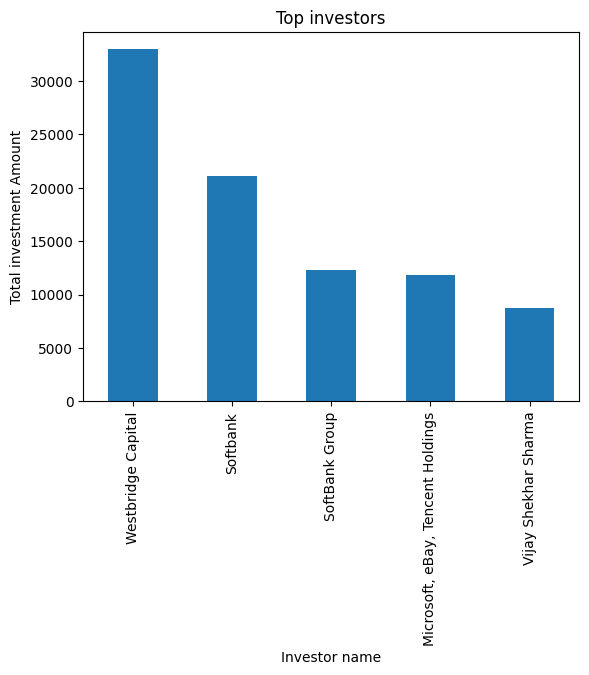

In [37]:
#top investors
top_investor=df.groupby('Investor')['Amount'].sum().sort_values(ascending=False).head(5)
top_investor.plot(kind='bar',title='Top investors')
plt.xlabel('Investor name')
plt.ylabel('Total investment Amount')
plt.show()

<Axes: title={'center': 'top investing cities'}, xlabel='City'>

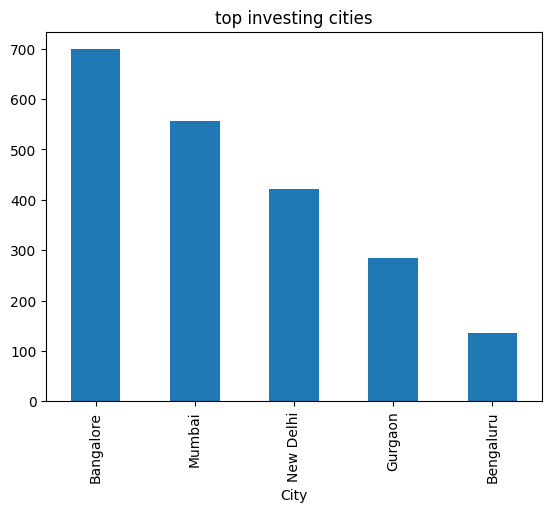

In [33]:
df['City'].value_counts().head(5).plot(kind = 'bar',title='top investing cities')

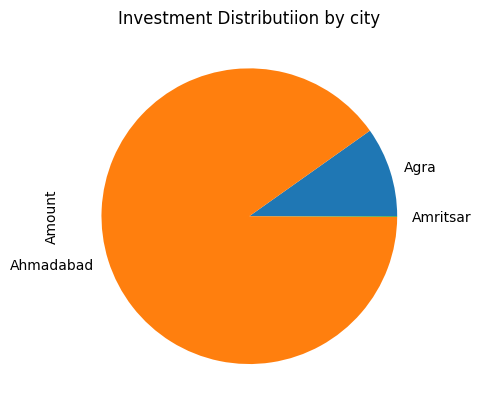

In [55]:
#investment distribution by city
investment_city=df.groupby('City')['Amount'].sum().head(3)
investment_city.plot(kind='pie',title='Investment Distributiion by city')
plt.show()

In [46]:
#Replace variational of city name
df['City']=df['City'].replace(['Ahmedabad','Ahemdabad','Ahemadabad'],'Ahmadabad')

df[df['Investor'] == 'Ratan Tata'].shape[0]

In [37]:
#Recent 5 Investments done by Ratan Tata
df[df['Investor'].str.contains('Ratan Tata')][['Date','startup','Vertical','City','Investment_type','Amount']].head(5)

,Date,startup,Vertical,City,Investment_type,Amount
Sr No,,,,,,
348,27/03/2018,The Print,Media,Delhi,Seed / Angel Funding,4.51433
839,23/05/2017,The Print,Consumer Internet,New Delhi,Seed Funding,159.08811
1267,04/10/2016,GOQii,Consumer Internet,Mumbai,Private Equity,159.08811
1368,13/09/2016,IdeaChakki,Consumer Internet,Delhi,Seed Funding,159.08811
1591,10/06/2016,Kyazoonga,eCommerce,Mumbai,Seed Funding,159.08811


<Axes: xlabel='startup'>

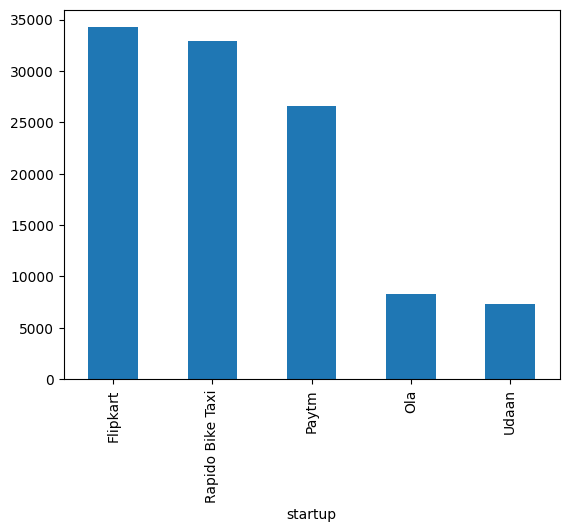

In [38]:
#top 5 most funded startups
df.groupby('startup')['Amount'].sum().sort_values(ascending = False).head(5).plot(kind= 'bar')

<Axes: xlabel='Subvertical'>

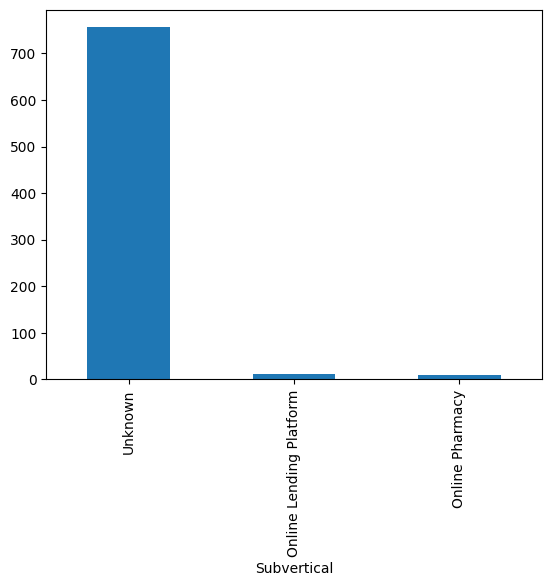

In [41]:
#Which subvertical receive the highest funding
df['Subvertical'].value_counts().head(3).plot(kind = 'bar')

In [42]:
#Who are the top 3 investors in FinTech sector
new_df = df[df['Vertical'] == 'FinTech'][['Investor','Amount','Vertical']].sort_values(ascending = False,by='Amount').head(3)

In [43]:
new_df

,Investor,Amount,Vertical
Sr No,,,
32,Vijay Shekhar Sharma,8438.000,FinTech
55,RPS Ventures,928.180,FinTech
87,WestBridge Capital,438.776,FinTech


<Axes: xlabel='Investor', ylabel='Amount'>

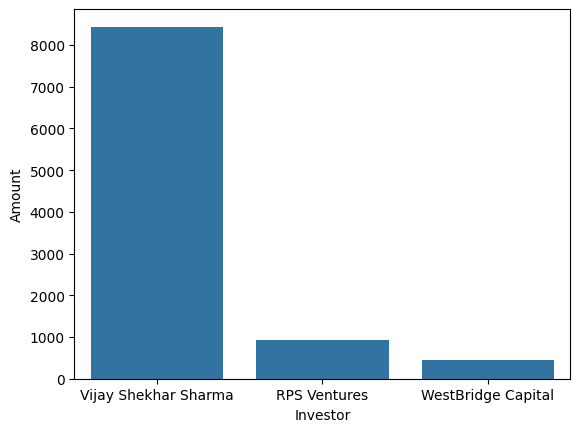

In [45]:
sns.barplot(data =new_df , x = 'Investor' , y = 'Amount' )